# 1) Setup

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import pickle
import networkx as nx
import re
import random

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [3]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_maxrange import *
from Normal_Gamma_bayes_nothreshold import *
from Normal_Gamma_bayes_initial import *
from Normal_Gamma_bayes_update import *
from Normal_Gamma_bayes_updateone import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *
from update_mean import *
from update_var import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_ks_threshold import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_origin_target import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) regression
from get_features import *

from regression_dataloader import *
from regression_dataloader_nofit import *
from regression_dataloader_square import *
from regressor_pointtest import *
from regressor_nsimilar import *

#6) Threshold-classification
from ks_dataloader import *


#6) Evaluation
from evaluate_groundtruth import *
from evaluate_offset import *

from evaluate_mle import *
from evaluate_mle_ensemble import *
from evaluate_bayes import *
from evaluate_bayes_ensemble import *

from random_prior import *
from specific_prior import *
from evaluate_prior import *
from evaluate_random import *
from evaluate_random_obs import *
from evaluate_random_ensemble import *
from evaluate_random_multiedge import *

from similar_length import *
from evaluate_length import *
from evaluate_length_ensemble import *
from evaluate_length_ensemble_obs import *
from compare_similar import *  #check supposedly similar distributions
from compare_length import *

from similar_classification import *
from evaluate_classification import *
from evaluate_classification_ensemble import *
from evaluate_classification_multiedge import *
from compare_classification import *

from similar_regression import *
from evaluate_regression import *
from evaluate_regression_ensemble import *
from evaluate_regression_multiedge import *
from compare_regression import *

from evaluate_specific_prior import *
from similar_length_fast import *
from start_ks_length import *
from start_ks_random import *
from similar_classification_fast import *
from start_ks_classification import *
from similar_regression_fast import *
from start_ks_regression import *

print("done")

done


In [4]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


In [33]:
#BLENHEIM
# retrieve data
df_blenheim_random_multi = pd.read_excel("data_blenheim_random_multi.xlsx")
df_blenheim_random_multi = df_blenheim_random_multi[["origin", "target", "edge_id", "operation_time", "n_robots"]]
# retrieve data
df_blenheim_targeted_multi = pd.read_excel("data_blenheim_targeted_multi.xlsx")
df_blenheim_targeted_multi = df_blenheim_targeted_multi[["origin", "target", "edge_id", "operation_time", "n_robots"]]
#merge data
df_blenheim_merge_multi = pd.concat([df_blenheim_random_multi,df_blenheim_targeted_multi])
df_blenheim_merge_multi = df_blenheim_merge_multi.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random_multi = pd.read_excel("data_walmart_random_multi.xlsx")
df_walmart_random_multi = df_walmart_random_multi[["origin", "target", "edge_id", "operation_time", "n_robots"]]
# retrieve data
df_walmart_targeted_multi = pd.read_excel("data_walmart_targeted_multi.xlsx")
df_walmart_targeted_multi = df_walmart_targeted_multi[["origin", "target", "edge_id", "operation_time", "n_robots"]]
#merge data
df_walmart_merge_multi = pd.concat([df_walmart_random_multi,df_walmart_targeted_multi])
df_walmart_merge_multi = df_walmart_merge_multi.sample(frac=1).reset_index(drop = True)

print("done")

done


In [84]:
# filter for congestion
min_robots = 3
df_blenheim_merge_multi = df_blenheim_merge_multi[df_blenheim_merge_multi["n_robots"]>=min_robots]
df_walmart_merge_multi = df_walmart_merge_multi[df_walmart_merge_multi["n_robots"]>=min_robots]

In [85]:
edge = "WayPoint76_Lift1"
seed = 1
print("edge is defined")

edge is defined


In [117]:
df_train = df_walmart_merge_multi
df_test = df_blenheim_merge_multi
filename_train = "walmart_map.yaml"
filename_test = "blenheim_map.yaml"
metric = "operation_time"
cutoff = 10

# 2) Train Clustering-Classification

## 2a) Clustering on Training map

In [87]:
#train map
threshold_matrix_train, threshold_edges_train, lone_edges_train = distances_ks_threshold(df_train, metric = metric, cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_train), len(lone_edges_train))

0 edges: 0.057845115661621094 secs
20 edges: 1.0812013149261475 secs
40 edges: 1.1799712181091309 secs
60 edges: 1.1909096240997314 secs
Time taken: 1.1948974132537842 secs
22 0


Optimum no. of clusters: 2
Max silhouette coeff: 0.5134878070144856


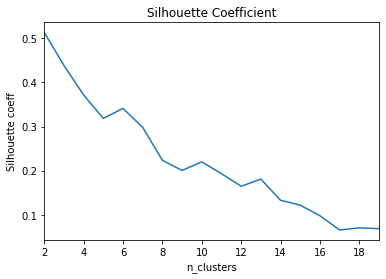

In [88]:
n_clusters, s_list = optimum_clusters(threshold_matrix_train, max_clusters = 20, method = "ss", linkage = "average")

In [89]:
clustering = AgglomerativeClustering(n_clusters=n_clusters[np.argmax(s_list)], affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_train )
print(labels)
threshold_clusters_train = pd.DataFrame(index = np.arange(len(threshold_edges_train)),columns = ["edge_id", "cluster_id"])
threshold_clusters_train["edge_id"] = threshold_edges_train
threshold_clusters_train["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0]
2 clusters


no. of edges: 256
CLuster 0 has colour code: r
CLuster 1 has colour code: g
Edges without enough data are black


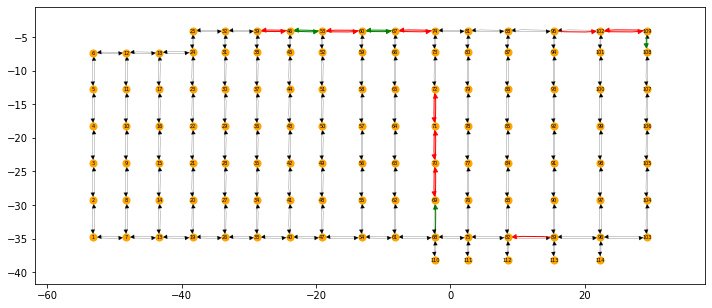

In [90]:
G = draw_clusters(filename_train, threshold_clusters_train, size = 2, rotate = False)

## 2b) Clustering on Test Map (for validation in 8c)

In [91]:
#test map
threshold_matrix_test, threshold_edges_test, lone_edges_test = distances_ks_threshold(df_test, metric = metric, cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_test), len(lone_edges_test))

0 edges: 0.008967161178588867 secs
Time taken: 0.5859975814819336 secs
12 1


Optimum no. of clusters: 3
Max silhouette coeff: 0.44890076720176


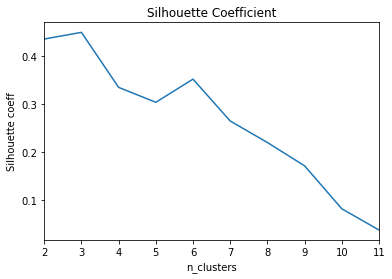

In [100]:
n_clusters, s_list = optimum_clusters(threshold_matrix_test, max_clusters = 12, method = "ss", linkage = "average")

In [101]:
clustering = AgglomerativeClustering(n_clusters=1, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_test )
print(labels)
threshold_clusters_test = pd.DataFrame(index = np.arange(len(threshold_edges_test)),columns = ["edge_id", "cluster_id"])
threshold_clusters_test["edge_id"] = threshold_edges_test
threshold_clusters_test["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 0 0 0 0 0 0 0 0 0 0 0]
1 clusters


no. of edges: 22
CLuster 0 has colour code: r
Edges without enough data are black


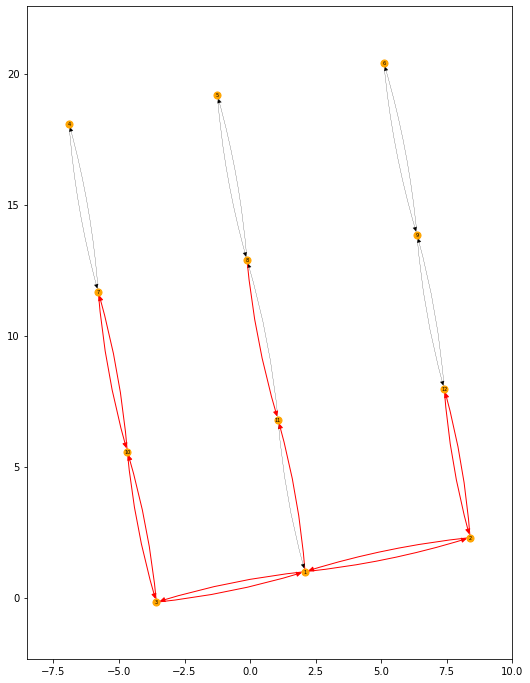

In [102]:
G = draw_clusters(filename_test, threshold_clusters_test, size = 3, rotate = True)

## 2c) Train Binary Classifier

In [103]:
#Load data into binary label format
#training map
df_class_diff_train = dataloader6(threshold_clusters_train, filename = filename_train)
#testing map
df_class_diff_test = dataloader6(threshold_clusters_test, filename = filename_test)

Time taken (dataloader6): 6.272185564041138 secs
Time taken (dataloader6): 0.6792480945587158 secs


Samples drawn: 192
Samples drawn: 66
Classifier type: gb
Accuracy: 0.6212121212121212
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.62      0.77        66

    accuracy                           0.62        66
   macro avg       0.50      0.31      0.38        66
weighted avg       1.00      0.62      0.77        66



C:\Users\pyliu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pyliu\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "
C:\Users\pyliu\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


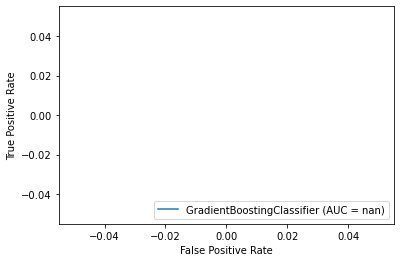

In [104]:
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf_clcl = classifier_pointtest(df_class_diff_train, df_class_diff_test,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

# 3) Train Regression

## 3a) KS Dataloader

In [105]:
#Train map
df_ks_diff_train = regression_dataloader_nofit(df_train, filename = filename_train,metric = metric,
                                             cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_train.tail(2)

Time taken (regression_dataloader): 6.915617942810059 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
64,WayPoint109_WayPoint102,WayPoint74_WayPoint67,53,50,0.344906,0.972905,1,0,1,0.00347126,0.00905659
65,WayPoint70_WayPoint69,WayPoint74_WayPoint67,51,50,0.165098,0.417156,1,1,2,0.00663931,1.56148


In [106]:
#Test map
df_ks_diff_test = regression_dataloader_nofit(df_test, filename = filename_test,metric = metric,cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_test.tail(2)

Time taken (regression_dataloader): 0.9145867824554443 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
50,WayPoint7_WayPoint10,WayPoint10_WayPoint7,125,81,0.228247,0,0,0,0,0.00279618,0.00279618
51,WayPoint7_WayPoint10,WayPoint1_WayPoint11,125,52,0.170154,0.305676,1,0,1,0.00600017,0.00600017


## 3b) Train KS Regressor

In [107]:
#Valid classifiers = ["ols", "rf", "gb, "ab", "svr"]
clf_reg = regressor_pointtest(df_train = df_ks_diff_train, 
                              df_test = df_ks_diff_test,
            features = ["edge_length_diff", "origin_connections_diff", 
            "target_connections_diff", "total_connections_diff", 
            "max_angle_diff", "sum_angle_diff"], 
            target = "ks",
            classifier= "rf")

MSE: 0.02290885480253141
MAE: 0.12555667383948554
Max/min y_pred: 0.43502602619391584 0.14388107248637166
Max/min y_test: 0.6253256314418394 0.06941406699666168


# 4) Train Threshold-Classificaton

## 4a) pval dataloader

In [108]:
#Train map
df_similar_diff_train = ks_dataloader(df_train, filename = filename_train,metric = metric,
                               threshold = 0.33,threshold_metric = "ks",
                                cutoff = 50, verbose = True, report_interval = 10000)

df_similar_diff_train.tail(2)

Time taken (regression_dataloader): 6.7333457469940186 secs


,edge1,edge2,n_obs1,n_obs2,ks,pval,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
64,WayPoint109_WayPoint102,WayPoint74_WayPoint67,53,50,0.344906,0.00302381,False,0.972905,1,0,1,0.00347126,0.00905659
65,WayPoint70_WayPoint69,WayPoint74_WayPoint67,51,50,0.165098,0.442424,True,0.417156,1,1,2,0.00663931,1.56148


In [109]:
#Test map
df_similar_diff_test = ks_dataloader(df_test, filename = filename_test,metric = metric,
                               threshold = 0.33,threshold_metric = "ks",
                               cutoff = 50, verbose = True, report_interval = 10000)

df_similar_diff_test.tail(2)

Time taken (regression_dataloader): 0.8875014781951904 secs


,edge1,edge2,n_obs1,n_obs2,ks,pval,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
50,WayPoint7_WayPoint10,WayPoint10_WayPoint7,125,81,0.228247,0.00964514,True,0,0,0,0,0.00279618,0.00279618
51,WayPoint7_WayPoint10,WayPoint1_WayPoint11,125,52,0.170154,0.208995,True,0.305676,1,0,1,0.00600017,0.00600017


## 4b) Train Classifier

Samples drawn: 40
Samples drawn: 52
Classifier type: gb
Accuracy: 0.6538461538461539
              precision    recall  f1-score   support

         0.0       0.25      0.25      0.25        12
         1.0       0.78      0.78      0.78        40

    accuracy                           0.65        52
   macro avg       0.51      0.51      0.51        52
weighted avg       0.65      0.65      0.65        52



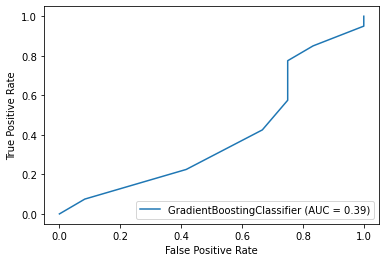

In [110]:
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf_thcl = classifier_pointtest(df_similar_diff_train, df_similar_diff_test,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

# 5) Initial KS

In [118]:
#random
initial_ks_random, edge_test_random, edge_prior_random = start_ks_random(df_train = df_train,
                                                        df_test = df_test,
                                                        filename_train = filename_train, 
                                                        filename_test = filename_test,
                                                        metric = metric,
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_random),np.std(initial_ks_random))


0 iterations: 0.9151625633239746 secs
11.918687343597412
0.40333140349076246 0.16299159974760039


In [119]:
#by length
initial_ks_length, edge_test_length, edge_prior_length = start_ks_length(df_train = df_train,
                                                        df_test = df_test,
                                                        filename_train = filename_train, 
                                                        filename_test = filename_test,
                                                        metric = metric,
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_length),np.std(initial_ks_length))

0 iterations: 0.8587033748626709 secs
16.71303963661194
0.372047554473216 0.12493982077312961


In [120]:
#Clustering-Classification
initial_ks_clustering, edge_test_clustering, edge_prior_clustering = start_ks_classification(df_train = df_train,
                                                        df_test = df_test,
                                                        clf = clf_clcl,
                                                        filename_train = filename_train, 
                                                        filename_test = filename_test,
                                                        metric = metric,
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_clustering),np.std(initial_ks_clustering))

0 iterations: 6.809170961380005 secs
18.96082067489624
0.4257595028015836 0.07606826763717284


In [121]:
#Regression
initial_ks_regression, edge_test_regression, edge_prior_regression = start_ks_regression(df_train = df_train,
                                                        df_test = df_test,
                                                        clf = clf_reg,
                                                        filename_train = filename_train, 
                                                        filename_test = filename_test,
                                                        metric = metric,
                                                                    cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_regression),np.std(initial_ks_regression))

0 iterations: 6.777597188949585 secs
26.160787343978882
0.42744053687066974 0.093069518642364


In [122]:
#Threshold-Classification
initial_ks_threshold, edge_test_threshold, edge_prior_threshold = start_ks_classification(df_train = df_train,
                                                        df_test = df_test,
                                                        clf = clf_thcl,
                                                        filename_train = filename_train, 
                                                        filename_test = filename_test,
                                                        metric = metric,
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_threshold),np.std(initial_ks_threshold))

0 iterations: 6.847463846206665 secs
22.454671144485474
0.46693265014778684 0.11706430996644608


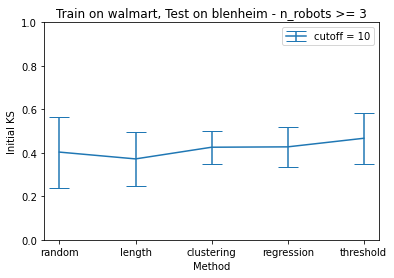

In [123]:
y_100 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_100 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

x = ["random", "length", "clustering", "regression", "threshold"]
plt.errorbar(x,y_100,yerr = yerr_100, capsize = 10, label = f"cutoff = {cutoff}")
plt.xlabel("Method")
plt.ylabel("Initial KS")
plt.title(f"Train on {filename_train[:-9]}, Test on {filename_test[:-9]} - n_robots >= {min_robots}")
plt.ylim([0,1])
plt.legend()


## 5b) Compare with different cutoffs

In [82]:
def initial_ks(df_train, df_test, 
                clf_clcl, clf_reg, clf_thcl,
                filename_train, filename_test,
                metric = "difference",
                cutoff = 50, verbose = False, plot_graph = False):
    #random
    initial_ks_random, edge_test_random, edge_prior_random = start_ks_random(df_train = df_train,
                                                            df_test = df_test,
                                                            filename_train = filename_train, 
                                                            filename_test = filename_test,
                                                            metric = metric,
                                                            cutoff = cutoff, verbose = verbose)
    if verbose:
        print("Random:", np.mean(initial_ks_random),np.std(initial_ks_random))
    
    #by length
    initial_ks_length, edge_test_length, edge_prior_length = start_ks_length(df_train = df_train,
                                                            df_test = df_test,
                                                            filename_train = filename_train, 
                                                            filename_test = filename_test,
                                                            metric = metric,
                                                            cutoff = cutoff, verbose = verbose)
    if verbose:
        print("Length:", np.mean(initial_ks_length),np.std(initial_ks_length))
    
    #Clustering-Classification
    initial_ks_clustering, edge_test_clustering, edge_prior_clustering = start_ks_classification(df_train = df_train,
                                                            df_test = df_test,
                                                            clf = clf_clcl,
                                                            filename_train = filename_train, 
                                                            filename_test = filename_test,
                                                            metric = metric,
                                                            cutoff = cutoff, verbose = verbose)
    if verbose:
        print("Clustering-Classification:", np.mean(initial_ks_clustering),np.std(initial_ks_clustering))
    
    #Regression
    initial_ks_regression, edge_test_regression, edge_prior_regression = start_ks_regression(df_train = df_train,
                                                            df_test = df_test,
                                                            clf = clf_reg,
                                                            filename_train = filename_train, 
                                                            filename_test = filename_test,
                                                            metric = metric,
                                                                        cutoff = cutoff, verbose = verbose)
    if verbose:
        print("Regression:", np.mean(initial_ks_regression),np.std(initial_ks_regression))
    
    #Threshold-Classification
    initial_ks_threshold, edge_test_threshold, edge_prior_threshold = start_ks_classification(df_train = df_train,
                                                            df_test = df_test,
                                                            clf = clf_thcl,
                                                            filename_train = filename_train, 
                                                            filename_test = filename_test,
                                                            metric = metric,
                                                            cutoff = cutoff, verbose = verbose)
    if verbose:
        print("Threshold-Classification:", np.mean(initial_ks_threshold),np.std(initial_ks_threshold))
    
    y = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
    yerr = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]
    
    if plot_graph:
        x = ["random", "length", "clustering", "regression", "threshold"]
        plt.errorbar(x,y,yerr = yerr, capsize = 10, label = f"cutoff = {cutoff}")
        plt.xlabel("Method")
        plt.ylabel("Initial KS")
        plt.title(f"Train on {filename_train[:-9]}, Test on {filename_test[:-9]}")
        plt.ylim([0,1])
        plt.legend()
        
    return x, y, y_err

In [83]:
cutoff_list = [10,50,100,200]

In [ ]:
for cutoff in cutoff_list:
    x,y,y_err = 